## değişken ve türleri

**nicel değişken:** sayılarla ifade edilebilinen değişkenlerdir <br>
**nitel değişken:** sayısal olarak ifade edilemeyen, sembollerle ifade edilen değişkenlerdir <br>
**sürekli değişken:** sonsuz sayıda olan değişkenlerdir. örneğin 0 ve 1 arasındaki sonsuz sayıdaki rasyonel sayılar <br>
**süreksiz değişken:** belli bir sayıda, sınırlı sayıda değer alabilen değişkenlerdir. örneğin bir insanın 1 dakikada atladığı ip sayısı <br>

In [1]:
# uygulama
import pandas as pd

nitel = pd.Series(["a","b","c","d"], dtype="category")
print(nitel)

nicel = pd.Series([1,3,5,7,9])
print(nicel)

0    a
1    b
2    c
3    d
dtype: category
Categories (4, object): [a, b, c, d]
0    1
1    3
2    5
3    7
4    9
dtype: int64


## merkezi eğilim ölçüleri

**En temel merkezi eğilim ölçüleri:** average/mean, median, mod <br>
**En sık kul. dağılım ölçüleri:** varyans(variance), standart sapma(st. deviation), standart hata(st. error) <br>

In [2]:
import numpy as np

df = pd.DataFrame()

df["age"] = [28, 42, 27, 24, 35, 54, 35, 37]

rassal = np.append(np.random.normal(69, 8, 100), np.random.normal(64, 5, 100))

print(rassal)

[58.86366236 73.82459622 61.86725713 60.82086301 64.392565   76.38218601
 72.53279163 71.24757803 56.55280201 71.64252717 75.58146395 70.94063597
 67.54194756 62.96704167 83.10865028 73.09009545 64.74420516 76.94611851
 75.67430783 69.67087183 62.13569718 62.07735363 64.57880374 81.67135513
 71.03466632 71.83983581 62.74769275 62.62286642 78.38089532 62.97503856
 74.79271624 75.41915811 70.72848719 72.59239563 65.00727407 77.1795315
 68.748772   80.07739921 69.22575338 71.81021952 72.91831094 63.54252966
 68.57839712 55.07289473 72.25989341 65.33445265 67.73079782 57.11855253
 75.3504482  78.03951963 67.57509365 77.29913296 71.65805329 70.08109749
 70.26426405 54.97038445 78.59627798 59.65822504 60.20234925 61.06917396
 69.91758831 72.00595336 64.81060229 51.43303031 75.34705235 80.65569791
 72.63715022 53.63123046 64.12820182 71.03916393 63.17311977 69.73520573
 67.69254341 65.64763075 64.28284692 60.51835862 74.60946815 77.0146428
 81.34147935 72.4684984  66.95867217 75.49537212 76.1

In [3]:
# mean
print("Python mean for \"age\": ", sum(df["age"]) / len(df["age"]))
print("Python mean for \"rassal\": ", sum(rassal) / len(rassal))

print("\nNumpy mean for \"age\": ", np.mean(df["age"]))
print("Numpy mean for \"rassal\": ", np.mean(rassal))

Python mean for "age":  35.25
Python mean for "rassal":  66.74411452031593

Numpy mean for "age":  35.25
Numpy mean for "rassal":  66.74411452031599


In [4]:
# median
import statistics    # Python'un istatistik modülü

print(statistics.median(df["age"]))
print(np.median(df["age"]))

35.0
35.0


In [5]:
# mode:
# Mod değerler arasında en sık geçen değeri gösterir.
# Diğer bir değişle, mod analizi ile veride birden fazla kümelenme olup olmadığı tespit edilir.
# Eğer iki veya daha fazla değer aynı sayıda tekrar ederse çift mod oluşacaktır.
# Aşağıdaki kodu çift mod içeren bir veri ile çalıştırsaydınız hata alabilirdiniz.
# Aşağıdaki kod istisnalar oluşturmadan çift modlu verileri ele alabilecektir, fakat siz ilk modu alacaksınız.

print(statistics.mode(df["age"]))

35


In [6]:
(values, counts) = np.unique(df["age"], return_counts=True, return_index=False)    # https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.unique.html

indx = np.argmax(counts)    # Returns the indices of the maximum values along an axis. https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html

print("values :", values)
print("count :", counts)
print("indx :", indx)
print("values[indx] :", values[indx])    # The most frequent element.


values : [24 27 28 35 37 42 54]
count : [1 1 1 2 1 1 1]
indx : 3
values[indx] : 35


**Yanlılık (bias) hakkında bir not:** Örneklemden hesaplanan ortalama, medyan ve mod popülasyon hakkında tarafsız (yanlı olmayan) bir tahmin olarak düşünülür. Bir tahmin tarafsız ise, örnek popülasyonu en iyi şekilde temsil eder. Taraflı bir gözlem ise popülasyon değerinin ya üstünde ya da altında bir değere yaklaşım gösterecektir. Yanlılık kısaca şu şekilde ifade edilebilir:

***Yanlılık = Örneklem Ortalaması - Popülasyon Ortalaması***

Tarafsız tahmin kullanışlıdır, daha büyük bir grup hakkında genelleme yapabilmek için küçük bir grup üzerinde gözlem yapabilmemizi sağlar. Bu derste gösterdiğimiz uygulamalar aslında örneklem üzerinde yapılmış çalışmalar. Örneklem ve popülasyon üzerinde bu bölümün son dersinde duracağımız için bu küçük notu kısa kesiyoruz.

## dağılım ölçüleri

**En temel merkezi eğilim ölçüleri:** average/mean, median, mod <br>
**En sık kul. dağılım ölçüleri:** varyans(variance), standart sapma(st. deviation), standart hata(st. error) <br>


### variance
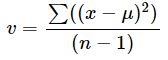
Varyans, her bir veri noktasının ortalamaya olan farkının karelerinin toplamının, gözlem sayısının bir eksiğine bölümü ile bulunur. <br>
Birçok insan ortalamayı bulup onun üzerinde çalışma yaparken, veri bilimciler genellikle varyans üzerinde çalışırlar. Çünkü veri bilimciler araştırma konusu değişkenin neden birbirinden farklı davrandığını anlamaya çalışırlar. Neden bu mağazanın kazanç marjı diğerlerinden çok yüksek? Neden bu ilacın yan etkileri diğer emsal ilaçlara göre çok daha az? Neden bazı müşteriler şirketin web sitesinde daha fazla zaman geçiriyorlar? gibi sorular aslında varyansla ilgilidir. Yüksek varyansa sahip bir değişken gözlemler hakkında farklılıkları ele verir, bu sayede veri bilimciler gelecek çıktıları anlamak için bunları kullanırlar.Burada μ popülasyon ortalamasını temsil etmektedir.

Varyansın hesaplanması ile ilgili iki gariplik var. Neden farkın karesi alınıyor ve neden n ‘e değilde (n-1)’e bölünüyor.

İlk soruya cevap olarak, ortalamaya göre sadece fakları alınsaydı toplamı sıfır olurdu çünkü yarısı negatif, yarısı pozitif olacaktı. Karesini alarak negatif değerleri kullanışlı hale getiriyoruz. Tabi ki mutlak değeri alarak hesaplayabilirdik, bu sayede negatif değerleri kullanabilirdik. Karesini almanın başka matematiksel faydaları var bunu sonra tartışacağız. Neden n-1 aldığımızın cevabı ise yanlılıkla (bias) alakalı olduğundan şimdilik tartışmasına girmiyoruz. _(sanırım Sample grup olunca n-1, tüm populasyon olunca n alıyorduk, ondan.)_

In [7]:
print("Numpy variance: ", np.var(df["age"], ddof=1))    # “Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, where N represents the number of elements. By default ddof is zero.
print("Pandas variance: ", df["age"].var())    ## variance neyi ifade ediyor?

Numpy variance:  92.5
Pandas variance:  92.5


### standard deviation
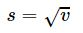
Değişkenliği ölçmekte en çok kullanılan göstergelerden birisi varyansın karekökünün alınmasıdır, buna standart sapma adını veririz.

In [8]:
np.std(df["age"], ddof=1)    # popülasyon için ddof=0 idi, default değeri zaten

9.617692030835672

### standard error
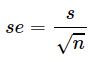
Verideki değişkenliğin tespitinde sıklıkla kullanılan diğer bir gösterge ise standart hatadır. Standart hata örneklem ortalamasının belirsizliğinin bir ölçüsüdür. Standart sapma bize varyans hakkında bilgi verirken, standart hata bize ortalama hakkında bilgi verir.

Anket sonuçları standart hata kullanımı için güzel bir örnektir. Genellikle hata marjı olarak bilinir. Örneğin bir anket sonucu %44 ‘ün X ‘i desteklediğini söyler ve %3 standart hata olabileceğini söyler. Diğer bir deyişle seçim bittiğinde sonuçlar %41 ile %47 arasında olabilir demektir. Standart hata ne kadar küçük olursa ortalamanın bize daha kesin ölçüldüğünü anlatır.

Standart hata, standart sapmanın gözlem sayısının kareköküne bölünmesiyle bulunur:

In [9]:
np.std(df["age"], ddof=1) / np.sqrt(len(df["age"]))

3.4003676271838605

c:\program files (x86)\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\program files (x86)\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\program files (x86)\python38-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\program files (x86)\python38-32\

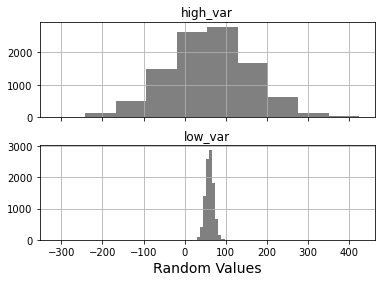

Max values :
 high_var    423.954729
low_var      96.705480
dtype: float64

Min values :
 high_var   -315.256527
low_var      21.122098
dtype: float64


In [10]:
import matplotlib.pyplot as plt

pop = pd.DataFrame()

# Ortalaması 60, standart sapması 10 ve 100 olan iki değişkenin oluşturulması
pop["high_var"] = np.random.normal(60, 100, 10000)
pop["low_var"] = np.random.normal(60, 10, 10000)

pop.hist(layout=(2,1), sharex=True, color="gray")    # sharex: share the x axis
plt.xlabel("Random Values", fontsize=14)
plt.show()

print("Max values :\n", pop.max())
print("\nMin values :\n", pop.min())

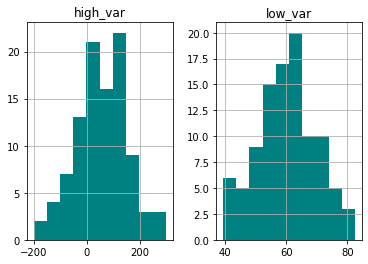

Mean values:
 high_var    59.294409
low_var     60.072111
dtype: float64

Standard Deviation:
 high_var    97.042828
low_var      9.639819
dtype: float64


In [11]:
# şimdi yukarıdaki popülasyondan 100'er örnek alacağız
sample = pd.DataFrame()
sample["high_var"] = np.random.choice(pop["high_var"], 100)   # 100 adet rastgele seçim
sample["low_var"] = np.random.choice(pop["low_var"], 100)

sample.hist(color="teal", layout=(1,2))
plt.show()

print("Mean values:\n", sample.mean())
print("\nStandard Deviation:\n", sample.std(ddof=1))

Örneklem popülasyondan rastgele seçildiği için, kodu her seferinde tekrar çalıştırabilir ve yeni örneklem üzerinde deneyebilirsiniz. Birkaç kere denemenizi tavsiye ederiz. Düşük değişkenliğe sahip örneklemin popülasyon ortalamasına ve standart sapmasına, yüksek değişkenliğe sahip örneklemden daha yakın olduğunu göreceksiniz.

Popülasyondan her örneklem seçildiğinde, dağılımın en uç noktalarından değerler (outlier) çekme ihtimalimiz var. En uç noktalardan değer almak örneklemin ortalamasını popülasyon ortalamasından uzaklaştırabilir. Bu yüzden yüksek değişkenlikli değişkenlerin düşüklere göre ortalamadan uzaklaşma potansiyelleri daha fazladır. Bu sorunu mümkün olduğunca örneklem sayısını artırarak giderebiliriz. Bunu ilerde detaylı bir şekilde tartışacağız.

## alıştırma

In [12]:
# pandas ve numpy'ı yukarıda import etmiştik.
data = pd.DataFrame()
data["Gender"] = ["male"]*100 + ["female"]*100
data["Weight"] = np.append(np.random.normal(69,8,100), np.random.normal(64,5,100))
data["Height"] = np.append(np.random.normal(195,25,100), np.random.normal(166,15,100))
data.info()    # verinin yapısı ile ilgili bilgi edinme

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  200 non-null    object 
 1   Weight  200 non-null    float64
 2   Height  200 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.0+ KB


In [13]:
data.head(3)    # ilk "n" satır. boş bırakırsan default olarak n=5 alıyor.

,Gender,Weight,Height
0,male,61.971962,159.539626
1,male,68.192502,210.216388
2,male,68.181282,185.097612


In [14]:
data.head(-190)    # negatif değer: son "n" satır hariç hepsi

,Gender,Weight,Height
0,male,61.971962,159.539626
1,male,68.192502,210.216388
2,male,68.181282,185.097612
3,male,74.209731,220.283860
4,male,82.967919,209.987448
5,male,60.382275,184.139143
6,male,85.647862,158.183099
7,male,64.699337,191.524562
8,male,60.032652,199.031025
9,male,66.829596,184.299208


In [15]:
data.tail()    # son n satır. default n=5

,Gender,Weight,Height
195,female,59.099010,172.586369
196,female,66.424500,182.685409
197,female,55.441890,166.491503
198,female,59.560260,148.840090
199,female,55.828552,155.611080


In [16]:
data.tail(-189)    # ilk n satır hariç son kalanlar

,Gender,Weight,Height
189,female,55.566583,192.702966
190,female,60.090093,197.652413
191,female,62.511840,170.563700
192,female,66.182018,188.190355
193,female,65.334703,195.195019
194,female,63.534757,165.877183
195,female,59.099010,172.586369
196,female,66.424500,182.685409
197,female,55.441890,166.491503
198,female,59.560260,148.840090


In [17]:
print("Height mean: ", data.Height.mean())
print("Weight standard dev: ", data["Weight"].std())    # remember: it works for both dot and bracket notation

Height mean:  179.47119297614066
Weight standard dev:  7.642230059008575


In [18]:
# Ağırlık verilerinin içinde yer alan boşlukların (NaN), verilerin ortalaması ile doldurulması/değiştirilmesi
w_mean = data.Weight.mean()
data["Weight"].fillna(w_mean)
print(f"Ağırlık ortalaması: {w_mean:.2f}")

Ağırlık ortalaması: 66.46
